# NLP Project: Misinformation detection 

<div style="text-align: center;">
    <img src="image/fake_news.jpeg" alt="Exemple d'image" style="width: 30%;"/>
</div>

---

### **Project Overview**

This project is part of the **NLP course assessment**. The evaluation takes the form of a **personal project**, where the goal is to write a scientific mini-article reporting an experiment on an NLP problem. The approach is as follows:

1. **Choice of an NLP problem**: Select a problem for which there are reference datasets and state-of-the-art results published in peer-reviewed conferences or journals.
2. **Brief state-of-the-art**: Summarize the existing research and methods related to the problem.
3. **Proposal and justification of an experiment**: Propose an experiment to evaluate a model and justify its relevance.
4. **Data preparation**: Retrieve, format, and describe the data statistically.
5. **Experiments**: Conduct experiments with the proposed model.
6. **Analysis and conclusion**: Analyze the results and provide a conclusion.


### **Group Members**

- **`Amine Razig`**
- **`Mohamed Keteb`**


### **Objective**

The objective of this project is to explore an NLP problem in depth, implement various methods, and analyze the results to draw meaningful conclusions. This will involve both classical NLP techniques and modern deep learning approaches.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Présenation du projet  : 

<div style="text-align: center;">
    <img src="image/illustration2.png" alt="Exemple d'image" style="width: 50%;"/>
</div>


### **Plan des explorations :**

### Étape 1 : Analyse exploratoire des données (EDA)

    **Objectif** : Comprendre la structure des données, détecter les valeurs manquantes, visualiser la distribution des classes, et explorer les caractéristiques textuelles.


### Étape 2 : Prétraitement des données

    **Objectif** : Nettoyer les données textuelles pour les rendre exploitables par des modèles NLP.

### Étape 3 : Représentation des textes

**Objectif** : Transformer les textes en une représentation numérique.

    **Méthodes à tester** :
    - Bag of Words (BoW).
    - TF-IDF.
    - Word embeddings (Word2Vec, GloVe, FastText).
    - Sentence embeddings (BERT, RoBERTa).


### Étape 4 : Modélisation classique

**Objectif** : Utiliser des modèles de machine learning classiques pour classifier les textes.

    **Modèles à tester** :
    - Logistic Regression.
    - Naive Bayes.
    - Support Vector Machines (SVM).
    - Random Forest.


### Étape 5 : Modélisation avancée (Deep Learning)

**Objectif** : Utiliser des modèles de deep learning pour améliorer les performances.

    **Modèles à tester** :
    - RNN (LSTM, GRU).
    - CNN pour le texte.
    - Transformers (BERT, DistilBERT, etc.).


### Étape 6 : Évaluation des modèles

## Étape 1 : Analyse exploratoire des données (EDA)

Fake news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB
None

True news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB
None

Combined dataset:
label
fake    23481
true    21417
Name: count, dtype: int64


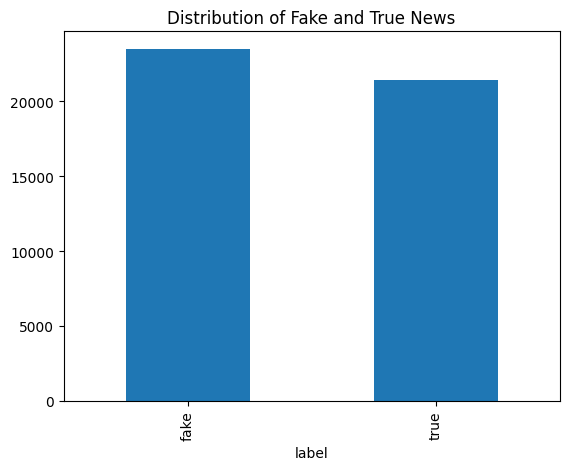

In [3]:
from src.eda import load_and_explore_data

data = load_and_explore_data('data/Fake.csv', 'data/True.csv')

### Statistiques descriptives sur les longueurs

Valeurs manquantes par colonne :
title      0
text       0
subject    0
date       0
label      0
dtype: int64
Nombre de doublons dans les données : 209


Statistiques descriptives des longueurs de titres et de textes :

       title_length   text_length
count  44898.000000  44898.000000
mean      80.111720   2469.109693
std       25.379685   2171.617091
min        8.000000      1.000000
25%       63.000000   1234.000000
50%       73.000000   2186.000000
75%       91.000000   3105.000000
max      286.000000  51794.000000


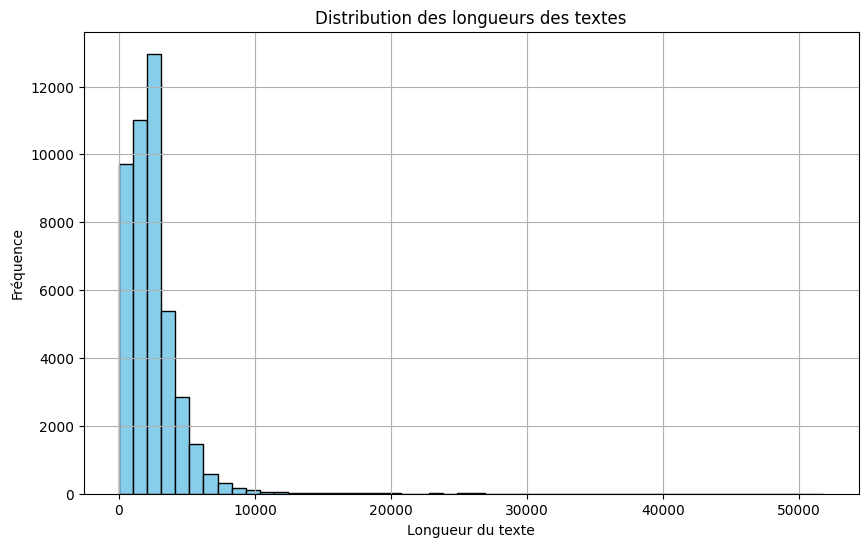

In [4]:
# valeurs manquantes
print("==" * 50)
print("Valeurs manquantes par colonne :")
print("==" * 50)
print(data.isnull().sum())

# doublons
print("==" * 50)
print("Nombre de doublons dans les données :", data.duplicated().sum())
print("==" * 50 + "\n")

# colonnes pour la longueur des titres et des textes
data['title_length'] = data['title'].apply(len)
data['text_length'] = data['text'].apply(len)

# Statistiques descriptives sur les longueurs
print("\n" + "==" * 50)
print("Statistiques descriptives des longueurs de titres et de textes :")
print("==" * 50 + "\n")
print(data[['title_length', 'text_length']].describe())

# distribution des longueurs des textes
plt.figure(figsize=(10, 6))
data['text_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution des longueurs des textes')
plt.xlabel('Longueur du texte')
plt.ylabel('Fréquence')
plt.show()

### Répartition des sujets


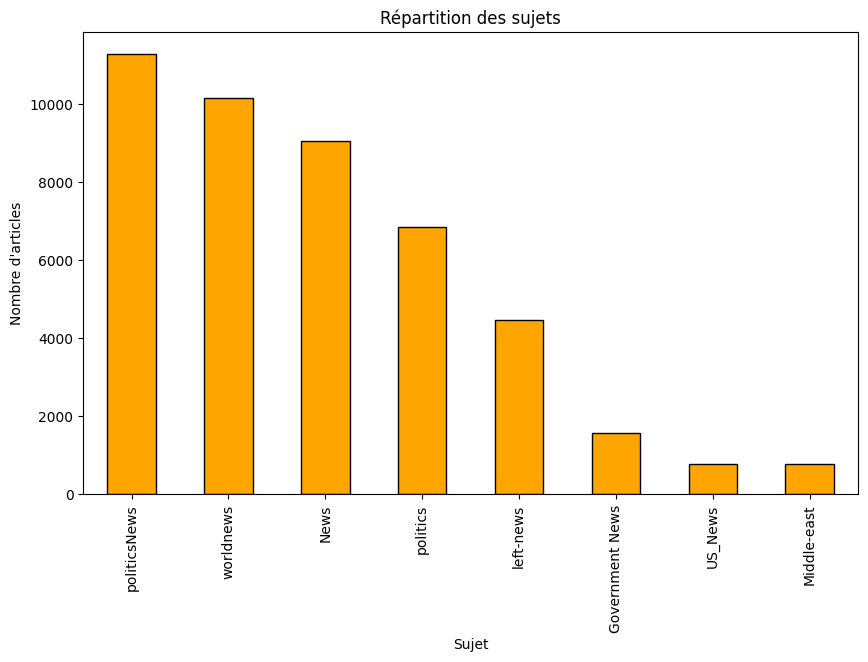

In [5]:
plt.figure(figsize=(10, 6))
data['subject'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Répartition des sujets')
plt.xlabel('Sujet')
plt.ylabel('Nombre d\'articles')
plt.show()

## Étape 2 : Prétraitement des données

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser les stopwords et le lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères spéciaux et les chiffres
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer les stopwords et appliquer la lemmatisation
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Appliquer le prétraitement sur les colonnes 'title' et 'text'
data['cleaned_title'] = data['title'].apply(preprocess_text)
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Afficher un exemple avant et après le nettoyage
print("Exemple avant nettoyage :")
print(data['text'].iloc[0])
print("\nExemple après nettoyage :")
print(data['cleaned_text'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/eleves-a/2024/amine.razig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /users/eleves-a/2024/amine.razig/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /users/eleves-a/2024/amine.razig/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Exemple avant nettoyage :
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His

## Étape 3 : Représentation des textes
#### L'objectif est de transformer les textes en une représentation numérique. On test diffrentes approches : 

**Bag Of Words** : 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Limiter à 5000 mots les plus fréquents

# Appliquer sur les textes nettoyés
bow_features = bow_vectorizer.fit_transform(data['cleaned_text'])

# Afficher la forme de la matrice BoW
print("Shape of Bag of Words matrix:", bow_features.shape)

Shape of Bag of Words matrix: (44898, 5000)


**TF-IDF**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiter à 5000 mots les plus fréquents

# Appliquer sur les textes nettoyés
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Afficher la forme de la matrice TF-IDF
print("Shape of TF-IDF matrix:", tfidf_features.shape)

Shape of TF-IDF matrix: (44898, 5000)


**Word Embeddings (Word2Vec, GloVe, FastText)**

In [9]:
from gensim.models import Word2Vec

# Tokeniser les textes nettoyés
tokenized_texts = data['cleaned_text'].apply(lambda x: x.split())

# Entraîner un modèle Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Exemple : Obtenir le vecteur pour un mot
print("Vecteur pour le mot 'news':", word2vec_model.wv['news'])

Vecteur pour le mot 'news': [-8.5481250e-01 -4.5338085e-01 -2.9696069e+00  3.5684094e+00
 -8.0237865e-01 -4.6832676e+00  9.9417478e-01  4.0548053e+00
 -4.0308714e+00 -7.7275950e-01 -9.2241877e-01  4.7073469e-01
  4.7734386e-01  1.6175511e+00  6.2013745e-01  1.9502686e+00
 -3.6956635e-01  1.1917896e+00  2.7626077e-02  2.9751718e+00
 -4.2832146e+00 -1.4935027e+00  9.4369018e-01  5.4643106e-01
 -6.0515851e-01 -1.8235672e+00  1.7190980e+00  2.3421502e+00
  5.0731206e-01  1.9626218e+00  1.3339272e-01 -4.9060698e+00
 -3.6966860e-01 -2.0341563e+00 -1.8711482e+00  7.3119271e-01
 -4.1442580e+00 -1.4880733e+00 -9.0447152e-01 -9.1651332e-01
 -1.4105207e+00 -2.7403636e-03  6.7472053e-01  2.3450325e+00
  4.9912119e+00  6.8861723e-01  1.5097685e+00  1.1674049e+00
  8.1833255e-01 -5.7741842e+00  1.4811745e+00  4.4072471e+00
 -6.7376447e-01 -1.3222151e+00  1.5507743e-01 -3.1218857e-01
 -2.2647135e+00 -7.1451849e-01 -1.0538199e+00 -3.4945554e-01
 -2.7779770e+00 -5.4794750e+00 -1.3557911e+00  3.7897435e

**Sentence Embeddings (BERT, RoBERTa)**

In [10]:
from transformers import BertTokenizer, BertModel
import torch

# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Tokeniser un exemple de texte
example_text = data['cleaned_text'].iloc[0]
tokens = tokenizer(example_text, return_tensors='pt', truncation=True, padding=True, max_length=512)

# Obtenir les embeddings
with torch.no_grad():
    embeddings = bert_model(**tokens)

# Afficher la forme des embeddings
print("Shape of BERT embeddings:", embeddings.last_hidden_state.shape)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Shape of BERT embeddings: torch.Size([1, 351, 768])


## Étape 4 : Modélisation classique
Objectif : Utiliser des modèles de machine learning classiques pour classifier les textes.

In [11]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X = tfidf_features  # Utilisez TF-IDF ou une autre représentation
y = data['label']   # La colonne des étiquettes ('fake' ou 'true')

# Encodage des étiquettes en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (35918, 5000)
Taille de l'ensemble de test : (8980, 5000)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialiser et entraîner le modèle
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Prédictions
y_pred = logistic_model.predict(X_test)

# Évaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.987305122494432

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialiser et entraîner le modèle
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prédictions
y_pred = nb_model.predict(X_test)

# Évaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.929064587973274

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [14]:
from sklearn.svm import LinearSVC

# Initialiser et entraîner le modèle
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Prédictions
y_pred = svm_model.predict(X_test)

# Évaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.9947661469933184

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9974387527839643

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## Etape 5 : Models de deep learning 

#### LSTM 

In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import torch.nn as nn

# 1. Dataset PyTorch compatible avec des séquences de vecteurs
class WordEmbeddingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # (samples, seq_len, embed_dim)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 2. Modèle LSTM adapté aux séquences de word embeddings
class LSTMBinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):  # x: (batch, seq_len, input_size)
        out, _ = self.lstm(x)  # out: (batch, seq_len, hidden_size)
        out = self.fc(out[:, -1, :])  # Prendre le dernier time step
        return self.sigmoid(out).squeeze(1)

# 3. Fonction d'entraînement et d'évaluation
def train_and_evaluate_lstm(X, y, input_size, hidden_size=128, num_layers=1, num_epochs=10, batch_size=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_dataset = WordEmbeddingDataset(X_train, y_train)
    test_dataset = WordEmbeddingDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = LSTMBinaryClassifier(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers).to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predicted = (outputs >= 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# 4. Préparation des features avec Word2Vec / GloVe / FastText
def prepare_word_embedding_features(tokenized_texts, embedding_model, max_len=100):
    embedding_dim = embedding_model.vector_size
    X = np.zeros((len(tokenized_texts), max_len, embedding_dim))
    for i, tokens in enumerate(tokenized_texts):
        for j, token in enumerate(tokens[:max_len]):
            if token in embedding_model.wv:
                X[i, j] = embedding_model.wv[token]
    return X

# 5. Exécution
print("Testing with Word Embeddings (e.g. Word2Vec, GloVe, FastText)...")

# Assurez-vous que `tokenized_texts` et `embedding_model` existent
# tokenized_texts = [['this', 'is', 'a', 'sentence'], ['another', 'example'], ...]
# embedding_model = Word2Vec.load(...) ou GloVe/FastText via gensim

word_embedding_features = prepare_word_embedding_features(tokenized_texts, word2vec_model)
labels = (data['label'] == 'true').astype(int).values  # Par exemple

train_and_evaluate_lstm(word_embedding_features, labels, input_size=word_embedding_features.shape[2])


Testing with Word Embeddings (e.g. Word2Vec, GloVe, FastText)...
Epoch [1/10], Loss: 0.3847
Epoch [2/10], Loss: 0.2735
Epoch [3/10], Loss: 0.0010
Epoch [4/10], Loss: 0.0010
Epoch [5/10], Loss: 0.0031
Epoch [6/10], Loss: 0.0096
Epoch [7/10], Loss: 0.0024
Epoch [8/10], Loss: 0.0004
Epoch [9/10], Loss: 0.0016
Epoch [10/10], Loss: 0.0015
Accuracy: 99.88%


#### CNN pour le text , Pour CNN  on utilise des représentations séquentielles (tokenizer + embedding layer).

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Préparer les données pour le CNN
def prepare_data_for_cnn(texts, labels, max_words=10000, max_len=100):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences, labels, tokenizer

# Construire le modèle CNN
def build_cnn_model(max_words=10000, max_len=100, embedding_dim=50):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Pour une classification binaire
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entraîner et évaluer le modèle CNN
def train_and_evaluate_cnn_model(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=10):
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return history

In [7]:
# Préparer les données pour le CNN
X = data['cleaned_text']  # Texte nettoyé
y = data['label']         # Étiquettes (fake/true)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les textes en séquences numériques et les remplir
X_train_cnn, y_train_cnn, tokenizer = prepare_data_for_cnn(X_train, y_train)
X_test_cnn, y_test_cnn, _ = prepare_data_for_cnn(X_test, y_test, max_words=tokenizer.num_words)

In [8]:
# Construire le modèle CNN
cnn_model = build_cnn_model(max_words=10000, max_len=100, embedding_dim=50)

# Résumé du modèle
cnn_model.summary()

/Users/aminerazig/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(type(X_train_cnn), X_train_cnn.dtype)
print(type(y_train_cnn), y_train_cnn.dtype)

# Convertir X_train_cnn et X_test_cnn en numpy array avec dtype int32
X_train_cnn = np.array(X_train_cnn, dtype=np.int32)
X_test_cnn = np.array(X_test_cnn, dtype=np.int32)

from sklearn.preprocessing import LabelEncoder

# Encoder les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
y_train_cnn = label_encoder.fit_transform(y_train_cnn)
y_test_cnn = label_encoder.transform(y_test_cnn)

print(type(X_train_cnn), X_train_cnn.dtype)
print(type(y_train_cnn), y_train_cnn.dtype)

<class 'numpy.ndarray'> int32
<class 'pandas.core.series.Series'> object
<class 'numpy.ndarray'> int32
<class 'numpy.ndarray'> int64


In [13]:
# Entraîner et évaluer le modèle CNN
history = train_and_evaluate_cnn_model(cnn_model, X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn, batch_size=32, epochs=10)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.8555 - loss: 0.2899 - val_accuracy: 0.9744 - val_loss: 0.0734
Epoch 2/10
535/898 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9905 - loss: 0.0346

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Visualiser la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Visualiser la précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision')
plt.xlabel('Épochs')
plt.ylabel('Précision')
plt.legend()
plt.show()